In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import numpy as np
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

import pickle

np.random.seed(0)
tf.random.set_seed(0)

In [2]:
model = tf.keras.models.load_model('../models/model1')

32/32 [==============================] - 0s 3ms/step


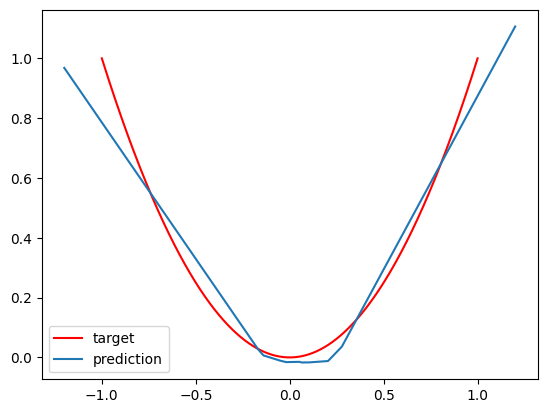

In [3]:
X = np.linspace(-1, 1, 1000)
y = X**2

X_pred = np.linspace(-1.2, 1.2, 1000)

plt.plot(X, y, color='red', label="target")
plt.plot(X_pred, model.predict(X_pred), label="prediction")
plt.legend()

In [4]:
from itertools import tee
def pairwise(it):
    a, b = tee(it)
    next(b, None)
    return zip(a,b)

In [6]:
def slope_checker(m, X, /, max_delta=0.00001):
    breakpoints = []
    predictions = m.predict(X, verbose=0)
    prev_point = (X[0], predictions[0][0])
    current_point = (X[1], predictions[1][0])

    for next in zip(X[2:], predictions[2:]):
        next_point = (next[0], next[1][0])
        #next_point = (next, m.predict([next], verbose=0)[0][0])
        if abs(slope(prev_point, current_point) - slope(current_point, next_point)) > max_delta:
            # print("slope1 = ", slope(prev_point, current_point))
            # print("slope2 = ", slope(current_point, next_point))
            # print("change at ", current_point)
            # print()
            breakpoints.append(current_point)
        prev_point = current_point
        current_point = next_point
    return breakpoints
    
def slope(p1, p2):
    return (p2[1]-p1[1]) / (p2[0]-p1[0])

In [ ]:
# model = keras.Sequential([
#     layers.Input(shape=(1,)),
#     layers.Dense(units=8, activation='relu'),
#     layers.Dense(units=8, activation='relu'),
#     layers.Dense(units=1, activation='linear'),
# ])
# callback = keras.callbacks.EarlyStopping(monitor='loss', patience=20)

# model.compile(
#     optimizer=keras.optimizers.SGD(learning_rate=0.001, momentum=0.9),
#     #optimizer=keras.optimizers.Adam(learning_rate=0.2, amsgrad=True),
#     # Loss function to minimize
#     loss=keras.losses.MeanSquaredError(),
#     # List of metrics to monitor
#     metrics=[keras.metrics.MeanSquaredError()],
# )
# h = model.fit(X, y, batch_size=64, epochs=100, verbose=2, callbacks=[callback])


model contains 42 breaks
32/32 [==============================] - 0s 3ms/step


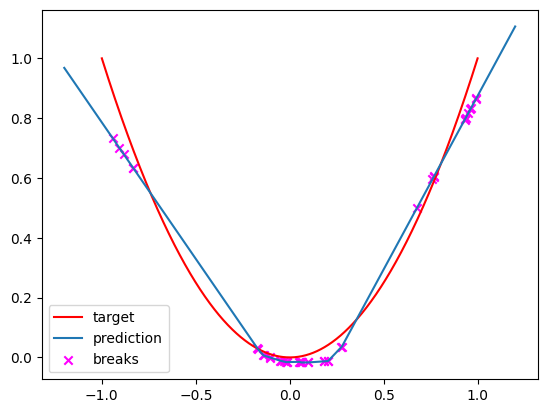

In [10]:
X = np.linspace(-1, 1, 1000)
y = X**2

X_pred = np.linspace(-1.2, 1.2, 1000)

bpoints = slope_checker(model, X, max_dPelta=0.0001)
print(f"model contains {len(bpoints)} breaks")
plt.plot(X, y, color='red', label="target")
plt.plot(X_pred, model.predict(X_pred), label="prediction")
plt.scatter(*zip(*bpoints), marker="x", color='magenta', label="breaks")
plt.legend()